<a href="https://colab.research.google.com/github/syahruaru/RF/blob/main/TF_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd


In [ ]:
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v0.2.1


In [ ]:
dataset360 = loadmat('/content/drive/MyDrive/data/dataset3-out-P.mat')

In [ ]:
print(dataset360['label'])
dataset = dataset360['dataset']

['dataset untuk proses klasifikasi 3 output Pronasi']


In [ ]:
dataset.shape

(180, 12, 10)

In [ ]:
target = loadmat('/content/drive/MyDrive/data/target3-out-P.mat')

print(target['label'])
target = target['target'][0]
#print(target)

['target untuk proses klasifikasi 3 output pronasi']


In [ ]:
int_array = target.astype(int)
target = int_array

In [ ]:
nsamples, nx, ny = dataset.shape
print(nsamples, nx, ny)
d2_train_dataset = dataset.reshape((nsamples,nx*ny))
#print(d2_train_dataset)
print(d2_train_dataset.shape)
print(type(d2_train_dataset))

180 12 10
(180, 120)
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(f'Dimensi data set: {d2_train_dataset.shape}')
print(f'Class: {set(target)}')


Dimensi data set: (180, 120)
Class: {0, 1, 2}


In [ ]:
#Menggunakan library sklearn
#Memisah dataset menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(d2_train_dataset,target,test_size=0.2,random_state=12)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(144, 120) (36, 120) (144,) (36,)


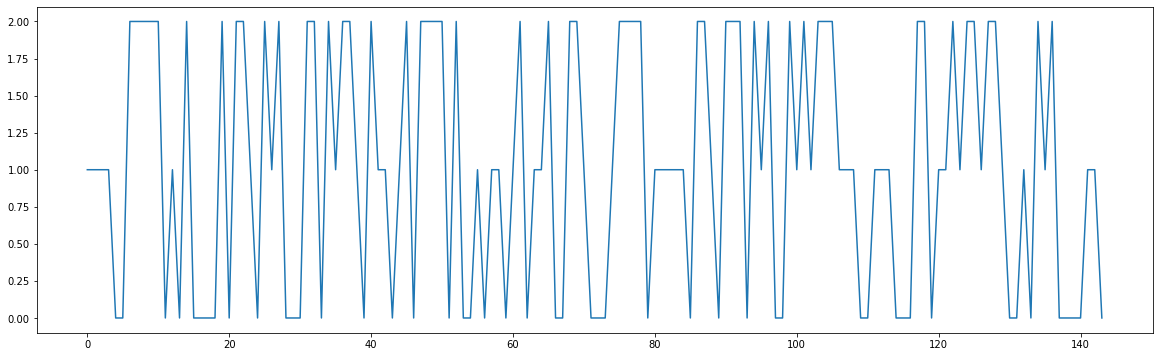

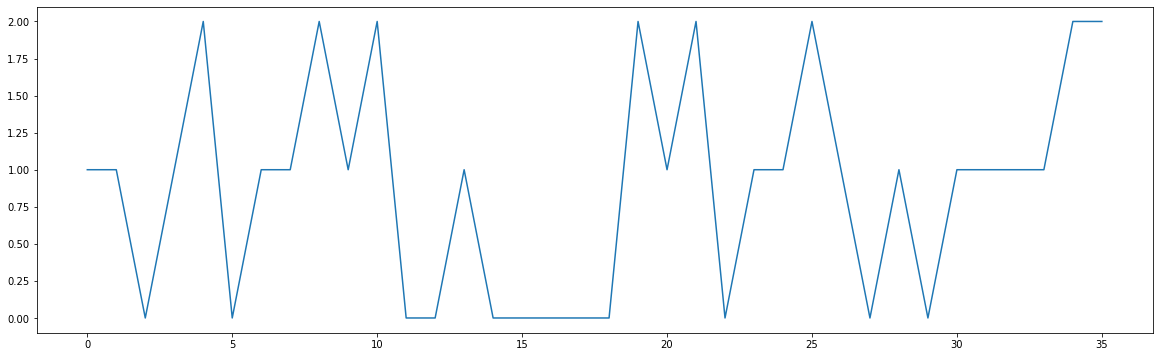

In [ ]:
plt.figure(figsize = [20,6])
plt.plot(y_train)
plt.figure(figsize = [20,6])
plt.plot(y_test)

In [ ]:
model = tfdf.keras.RandomForestModel()
model.fit(x_train,y_train)

5/5 [==============================] - 1s 94ms/step


In [ ]:
#Prediksi nilai y dari data train
y_predt = model.predict(x_train)
#Prediksi nilai y dari data test
y_pred = model.predict(x_test)

In [ ]:
y_predt

array([[0.04666667, 0.94333255, 0.01      ],
       [0.23999985, 0.71999943, 0.04      ],
       [0.17333324, 0.77666605, 0.05      ],
       [0.        , 0.6533328 , 0.34666643],
       [0.99666584, 0.00333333, 0.        ],
       [0.9799992 , 0.02      , 0.        ],
       [0.        , 0.00666667, 0.9933325 ],
       [0.        , 0.01      , 0.9899992 ],
       [0.00333333, 0.09333331, 0.9033326 ],
       [0.00666667, 0.20666654, 0.78666604],
       [0.        , 0.03333334, 0.96666586],
       [0.95333254, 0.04      , 0.00666667],
       [0.09666664, 0.8399993 , 0.06333334],
       [0.49333295, 0.46999964, 0.03666667],
       [0.        , 0.04333334, 0.9566659 ],
       [0.99999917, 0.        , 0.        ],
       [0.8599993 , 0.13333328, 0.00666667],
       [0.96333253, 0.03666667, 0.        ],
       [0.9899992 , 0.00666667, 0.00333333],
       [0.        , 0.        , 0.99999917],
       [0.9599992 , 0.03333334, 0.00666667],
       [0.00333333, 0.02666667, 0.9699992 ],
       [0.

In [ ]:
y_pred

array([[0.        , 0.5833329 , 0.41666636],
       [0.18333323, 0.7933327 , 0.02333334],
       [0.73333275, 0.22999986, 0.03666667],
       [0.28666648, 0.5633329 , 0.14999993],
       [0.05666667, 0.41666636, 0.5266663 ],
       [0.9266659 , 0.07333333, 0.        ],
       [0.07666666, 0.6266662 , 0.29666647],
       [0.34999976, 0.58999956, 0.06000001],
       [0.        , 0.2233332 , 0.77666605],
       [0.06000001, 0.84333265, 0.09666664],
       [0.        , 0.10666663, 0.8933326 ],
       [0.9733325 , 0.02666667, 0.        ],
       [0.6633328 , 0.3099998 , 0.02666667],
       [0.5533329 , 0.42333302, 0.02333334],
       [0.9233326 , 0.07      , 0.00666667],
       [0.8399993 , 0.15999992, 0.        ],
       [0.6366662 , 0.32666644, 0.03666667],
       [0.6533328 , 0.31333312, 0.03333334],
       [0.9066659 , 0.09333331, 0.        ],
       [0.        , 0.        , 0.99999917],
       [0.47333297, 0.52333295, 0.00333333],
       [0.04666667, 0.10666663, 0.846666  ],
       [0.

In [ ]:
y_predt = y_predt.round()
y_pred = y_pred.round()

In [ ]:
y_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_predt

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [ ]:
y_train

array([1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2])

In [ ]:
from tensorflow.keras.utils import to_categorical
n_class = 3
y_train = to_categorical(y_train,n_class, dtype ='float32')
y_test = to_categorical(y_test,n_class, dtype ='float32')

In [ ]:
y_train 

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_train, y_predt))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.98      0.95      0.97        44
           2       0.98      0.96      0.97        52

   micro avg       0.98      0.96      0.97       144
   macro avg       0.98      0.96      0.97       144
weighted avg       0.98      0.96      0.97       144
 samples avg       0.96      0.96      0.96       144



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         8

   micro avg       0.97      0.94      0.96        36
   macro avg       0.97      0.96      0.96        36
weighted avg       0.97      0.94      0.96        36
 samples avg       0.94      0.94      0.94        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Summary of the model structure.
model.summary()

Model: "random_forest_model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (120):
	data:0.0
	data:0.1
	data:0.10
	data:0.100
	data:0.101
	data:0.102
	data:0.103
	data:0.104
	data:0.105
	data:0.106
	data:0.107
	data:0.108
	data:0.109
	data:0.11
	data:0.110
	data:0.111
	data:0.112
	data:0.113
	data:0.114
	data:0.115
	data:0.116
	data:0.117
	data:0.118
	data:0.119
	data:0.12
	data:0.13
	data:0.14
	data:0.15
	data:0.16
	data:0.17
	data:0.18
	data:0.19
	data:0.2
	data:0.20
	data:0.21
	data:0.22
	data:0.23
	data:0.24
	data:0.25
	data:0.26
	data:0.27
	data:0.28
	data:0.29
	data:0.3
	data:0.30
	data:0.31
	data:0.32
	data:0.33
	data:0.34
	data:0.35
	data:0.36
	data:0.37
	data:0.38
	data:0.39
	data:0.4
	data:0

In [ ]:
tfdf.model_plotter.plot_model_in_colab(
model,
tree_idx=0,
max_depth=7
)

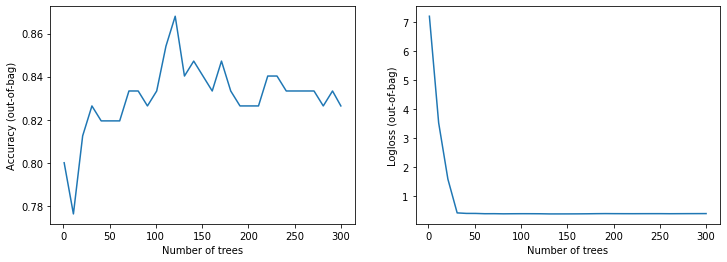

In [ ]:
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.show()